Testiramo, kako se obnese metrika v smislu primerjave med porazdelitvami.

In [1]:
import GMM
import numpy as np
from kernel_estimators import kde, hist_to_fun
import matplotlib.pyplot as plt
from optimalBinNumber import optBinNum

data1 = GMM.GMM([[0,1],[3,1]],20000)
data2 = GMM.GMM([[3.1,1],[-4.8,2]],20000)

y1,x1 = np.histogram(data1, bins=optBinNum(data1),density=1)
y2,x2 = np.histogram(data2, bins=optBinNum(data2),density=1)

pdf_hist1 = hist_to_fun((y1,x1))
pdf_hist2 = hist_to_fun((y2,x2))

x = np.linspace(-20,10,10000)

izris1 = [pdf_hist1(i) for i in x]
izris2 = [pdf_hist2(i) for i in x]

plt.plot(x,izris1)
plt.plot(x,izris2)

plt.show()


<Figure size 640x480 with 1 Axes>

Poglejmo, kakšne so distance med histogramoma v različnih metrikah.

In [2]:
from function_distances import *

d1 = d1_metric(pdf_hist1,pdf_hist2)
d2 = d2_metric(pdf_hist1,pdf_hist2)
sup = sup_metric(pdf_hist1,pdf_hist2)

print(d1)
print(d2)
print(sup)

0.8152695599982663
0.25722791417495067
0.16542687610578014


/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/function_distances.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  d1 = scipy.integrate.quad(F,bounds[0],bounds[1])
/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/function_distances.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  p

Distance glede na prave pdf:

In [3]:
from scipy.stats import gaussian_kde

pdf1 = gaussian_kde(data1)
pdf2 = gaussian_kde(data2)
print("pdf-a narejena")

# minimum = min(data1 + data2)-10
# maximum = max(data1 + data2)+10
# b =  [minimum, maximum]

d1 = d1_metric(pdf1,pdf2)
print("d1-done")
d2 = d2_metric(pdf1,pdf2)
print("d2-done")
sup = sup_metric(pdf1,pdf2)
print("sup-done")

print(d1)
print(d2)
print(sup)

pdf-a narejena
d1-done
d2-done
sup-done
0.8026964844884118
0.24440960332609002
0.16567891870847348


Izris pravih pdf:

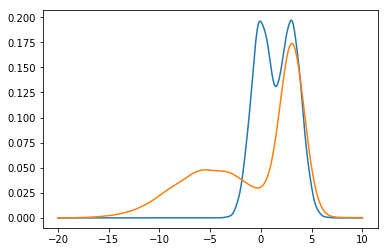

In [4]:
plt.plot(x,pdf1(x))
plt.plot(x,pdf2(x))

plt.show()


Metrika normalnih z različnimi mu in sigma glede na:
- pdf (gaussian kernel density estimation)
- histograme (scott - optimal bin size)

In [27]:
normalne_pdf = {}
normalne_hist = {}

for i in range(5):
    for j in range(1,10,2):
        a = GMM.GMM([[i,j]])
        normalne_pdf[(i,j)] = gaussian_kde(a)
        normalne_hist[(i,j)] = hist_to_fun(np.histogram(a,bins=optBinNum(a),density=1))

In [28]:
table = [["(mu1,std1)","(mu2,std2)","distance_pdf","distance_hist"],["","","",""]]

for el in normalne_pdf:
    table.append([str((0,1)),str(el),round(d1_metric(normalne_pdf[(0,1)],normalne_pdf[el]),4),round(d1_metric(normalne_hist[(0,1)],normalne_hist[(el)]),4)])

/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/function_distances.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  d1 = scipy.integrate.quad(F,bounds[0],bounds[1])


In [29]:
from print_table import print_table

# table
print_table(table)

   (mu1,std1)   (mu2,std2)   distance_pdf   distance_hist
                                                         
       (0, 1)       (0, 1)            0.0             0.0
       (0, 1)       (0, 3)         1.5559          1.5563
       (0, 1)       (0, 5)         1.8162          1.8164
       (0, 1)       (0, 7)         1.8976          1.9049
       (0, 1)       (0, 9)         1.9351          1.9342
       (0, 1)       (1, 1)         0.7721          0.7772
       (0, 1)       (1, 3)         1.5664          1.5614
       (0, 1)       (1, 5)         1.8121          1.8067
       (0, 1)       (1, 7)         1.8958          1.8971
       (0, 1)       (1, 9)         1.9333          1.9323
       (0, 1)       (2, 1)         1.3596          1.3799
       (0, 1)       (2, 3)         1.5736          1.5703
       (0, 1)       (2, 5)         1.8096          1.8094
       (0, 1)       (2, 7)         1.8967          1.8725
       (0, 1)       (2, 9)          1.935           1.959
       (0, 1) 

Kolikšna je razlika med pdf in histogramom za posamezne normalne porazdelitve $\mathcal{N}_i$ (tj. dist(pdf_i, hist_i))

In [30]:
for el in normalne_pdf:
    print("{}: ".format(str(el)), round(d1_metric(normalne_pdf[el],normalne_hist[el]),4))

(0, 1):  0.0422
(0, 3):  0.0429
(0, 5):  0.0488
(0, 7):  0.0436
(0, 9):  0.0457
(1, 1):  0.0454
(1, 3):  0.0482
(1, 5):  0.0548
(1, 7):  0.0501
(1, 9):  0.0505
(2, 1):  0.047
(2, 3):  0.0491
(2, 5):  0.0514
(2, 7):  0.0428
(2, 9):  0.0391
(3, 1):  0.0493
(3, 3):  0.0449
(3, 5):  0.0413
(3, 7):  0.0514
(3, 9):  0.0509
(4, 1):  0.0467
(4, 3):  0.042
(4, 5):  0.0431
(4, 7):  0.0459
(4, 9):  0.0382


Poglejmo še, kakšna je distanca, če gledamo normalne porazdelitve z repi (srednja vrenost je ista, rep odmikamo). Dodamo še renyi divergenco pri redu 0.5, 1 (KL), 2 in 5.

In [17]:
import GMM
from scipy.stats import gaussian_kde
from kernel_estimators import hist_to_fun
import numpy as np
from optimalBinNumber import optBinNum

normalne_z_repi_pdf = {}
normalne_z_repi_hist = {}

for i in range(20):
    if i == 0:
        a = GMM.GMM([[0,1]],20000)
        normalne_z_repi_pdf[i] = gaussian_kde(a)
        normalne_z_repi_hist[i] = hist_to_fun(np.histogram(a,bins=optBinNum(a),density=1))
        continue
    a = GMM.GMM([[0,1], [i*0.5,0.1]],20000, weights=[0.99,0.01])
    normalne_z_repi_pdf[i] = gaussian_kde(a)
    normalne_z_repi_hist[i] = hist_to_fun(np.histogram(a,bins=optBinNum(a),density=1))

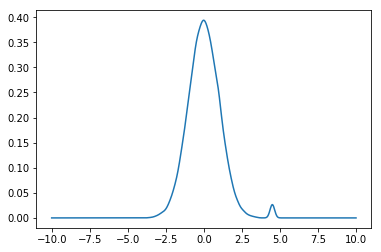

In [18]:
import matplotlib.pyplot as plt

x = np.linspace(-10,10,10000)
plt.plot(x, normalne_z_repi_pdf[9](x))

In [19]:
from renyi import renyi_divergence_cont
from function_distances import d1_metric

table = [["i","distance_pdf","distance_hist","renyi_pdf_0.5","renyi_pdf_1","renyi_pdf_2","renyi_pdf_5"],["","","","","","",""]]

m = -float("inf")
M = float("inf")

for el in normalne_z_repi_pdf:
    table.append([
        el,
        round(d1_metric(normalne_z_repi_pdf[0],normalne_z_repi_pdf[el]),4),
        round(d1_metric(normalne_z_repi_hist[0],normalne_z_repi_hist[(el)]),4),
        round(renyi_divergence_cont(normalne_z_repi_pdf[0],normalne_z_repi_pdf[el],0.5,m,M),4),
        round(renyi_divergence_cont(normalne_z_repi_pdf[0],normalne_z_repi_pdf[el],1,m,M),4),
        round(renyi_divergence_cont(normalne_z_repi_pdf[0],normalne_z_repi_pdf[el],2,m,M),4),
        round(renyi_divergence_cont(normalne_z_repi_pdf[0],normalne_z_repi_pdf[el],5,m,M),4)
    ])
    print(el)

0


/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/function_distances.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  d1 = scipy.integrate.quad(F,bounds[0],bounds[1])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [20]:
from print_table import print_table

print_table(table)

    i   distance_pdf   distance_hist   renyi_pdf_0.5   renyi_pdf_1   renyi_pdf_2   renyi_pdf_5
                                                                                              
    0            0.0             0.0            -0.0           0.0           0.0           0.0
    1         0.0292          0.0758          0.0007        0.0013        0.0028         0.016
    2         0.0347          0.0755          0.0006        0.0013        0.0029        0.0819
    3         0.0318          0.0731          0.0008        0.0016        0.0035        0.0165
    4         0.0324          0.0731          0.0011        0.0022        0.0045        0.1467
    5         0.0417           0.073          0.0023        0.0041        0.0068        0.0119
    6         0.0378          0.0745          0.0034        0.0055        0.0081        0.0118
    7          0.038          0.0799          0.0059        0.0082        0.0102        0.0132
    8         0.0354          0.0716          0.00

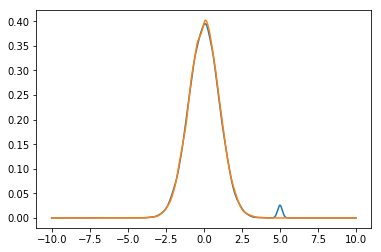

In [21]:
x = np.linspace(-10,10,10000)
plt.plot(x, normalne_z_repi_pdf[10](x))
plt.plot(x, normalne_z_repi_pdf[4](x))
plt.plot(x, normalne_z_repi_pdf[0](x))

Renyi je čuden... (i=8: renyi_pdf_5 je skoraj nič, pri i=7 je 9 - nerazumljiva razlika v primerjavi z indexi i=4,6,8)